In [1]:
# For data management
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import re

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# read datascience data
df = pd.read_csv("./data/DS_DA_BS.csv")
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role
10249,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,BA
10250,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,BA
10251,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,BA
10252,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,BA
10253,Financial Analyst II - Baptist,$66K-$114K (Glassdoor est.),Job Summary\n\nThis unique analyst position re...,2.7,Baptist Medical Center Jacksonville\n2.7,"Jacksonville, FL","Jacksonville, FL",5001 to 10000 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,BA


In [3]:
df["Job Title"].value_counts()


Data Analyst                                                              801
Business Analyst                                                          518
Data Scientist                                                            274
Data Engineer                                                             260
Senior Data Analyst                                                       145
                                                                         ... 
Specialist, Data Science                                                    1
Environmental Scientist/GIS Analyst - Midwest or                            1
Data Engineer *                                                             1
Soil Scientist (Direct Hire)                                                1
Programmer Analyst- PeopleSoft ( Finance and Supply Chain Management )      1
Name: Job Title, Length: 4868, dtype: int64

In [4]:
# get null values(-1) for columns
size = 30

for i in range(0, len(list(df.columns))):
    if i>0:
        col = df.columns[i]
        nulls = df[df[col]=="-1"].shape[0]
    else:
        col = "Columns"
        nulls = "Null or -1"
    spaces = size - 2 - len(col) - len(str(nulls))
    padding = ""
    for i in range(spaces):
        padding += " "
    print(col, padding, nulls)

Columns             Null or -1
Salary Estimate              1
Job Description              0
Rating                       0
Company Name                 0
Location                     0
Headquarters               632
Size                       602
Founded                      0
Type of ownership          602
Industry                  1423
Sector                    1423
Revenue                    602
Competitors               7479
Easy Apply                9876
role                         0


In [5]:
# utitility functions from jerry
#using re to extract numbers from the string
def extract_numbers(arr):#arr is the array of strings
    min_result=[]
    max_result=[]
#     result=[]
    for i in arr:
        temp=re.findall('[0-9]+',i)
        if len(temp)==2:
            min_result.append(int(temp[0]))
            max_result.append(int(temp[1]))
        else:
            min_result.append(int(temp[0]))
            max_result.append(int(temp[0]))
    return min_result,max_result  

def extract_numbers_max(x):
    temp=re.findall(r'[0-9]+',x)
    return max([int(i) for i in temp])

def extract_numbers_min(x):
    temp=re.findall(r'[0-9]+',x)
    return min([int(i) for i in temp])

In [6]:
# get median salary
df['min salary']=df['Salary Estimate'].apply(extract_numbers_min)
df['max salary']=df['Salary Estimate'].apply(extract_numbers_max)
df['Median Salary'] = (df['min salary'] + df['max salary'])/2
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,Median Salary
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181,146.0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181,146.0
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181,146.0
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181,146.0
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181,146.0


In [7]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            2726
$10+ billion (USD)                  1278
$100 to $500 million (USD)           979
$50 to $100 million (USD)            801
-1                                   602
$2 to $5 billion (USD)               602
$10 to $25 million (USD)             566
$1 to $2 billion (USD)               463
$1 to $5 million (USD)               461
$25 to $50 million (USD)             454
Less than $1 million (USD)           345
$5 to $10 billion (USD)              339
$500 million to $1 billion (USD)     334
$5 to $10 million (USD)              304
Name: Revenue, dtype: int64

Text(0, 0.5, 'max salary (thousands)')

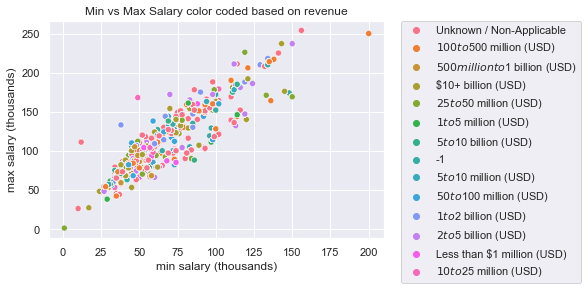

In [8]:
sns.scatterplot(data=df, x="min salary", y="max salary", hue="Revenue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Min vs Max Salary color coded based on revenue")
plt.xlabel("min salary (thousands)")
plt.ylabel("max salary (thousands)")

Text(0, 0.5, 'revenue')

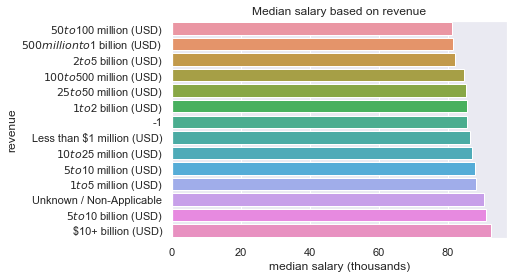

In [9]:
temp = df.groupby("Revenue")['Median Salary'].mean()
sorted_lists = [list(x) for x in zip(*sorted(zip(temp.index, temp.values), key=lambda pair: pair[1]))]
sns.barplot(y=sorted_lists[0], x=sorted_lists[1], orient = 'h')
plt.title("Median salary based on revenue")
plt.xlabel("median salary (thousands)")
plt.ylabel("revenue")

In [10]:
# make column with number of competitors
def lenCompetitors(c):
    if c=='-1':
        return 'unkown'
    return len(c.split(','))
df['Num competitors'] = df['Competitors'].apply(lenCompetitors)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,role,min salary,max salary,Median Salary,Num competitors
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,DS,111,181,146.0,unkown
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,DS,111,181,146.0,unkown
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE,DS,111,181,146.0,unkown
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,DS,111,181,146.0,2
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,DS,111,181,146.0,3


Text(0, 0.5, 'number of competitors')

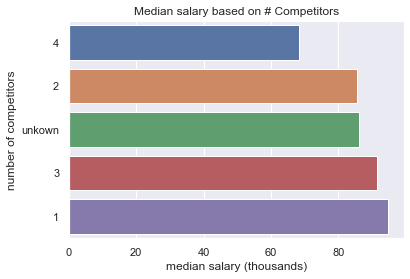

In [18]:
temp = df.groupby("Num competitors")['Median Salary'].mean()
sorted_lists = [list(x) for x in zip(*sorted(zip(temp.index, temp.values), key=lambda pair: pair[1]))]
sns.barplot(y=sorted_lists[0], x=sorted_lists[1], orient = 'h')
plt.title("Median salary based on # Competitors")
plt.xlabel("median salary (thousands)")
plt.ylabel("number of competitors")